In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

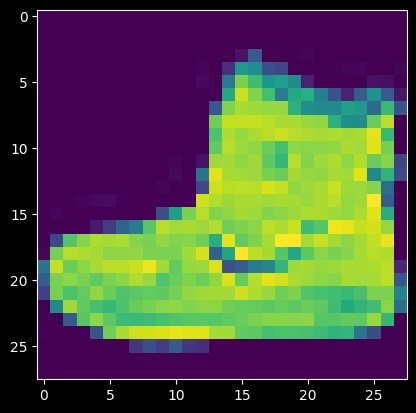

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

#### Normalization (i.e. changing all the above integer values to values between 0 and 1)

In [5]:
#training_images = training_images/255
#test_images = test_images/255

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

#### Training the model

In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 3.3297 - accuracy: 0.6767
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7225 - accuracy: 0.7364
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6284 - accuracy: 0.7766
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5517 - accuracy: 0.8100
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5230 - accuracy: 0.8219
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5106 - accuracy: 0.8286
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5052 - accuracy: 0.8318
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.8349
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4755 - accuracy: 0.8384
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.482

#### Evaluation of the model

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.8204


[0.5530686378479004, 0.8203999996185303]

#### Exercises

So down below, you see a list of probabilities, which add up to one. It basically indicates what class the model thinks the corresponding item belongs to

In [9]:
classifications = model.predict(test_images)
print(classifications[57])

[9.5904089e-04 1.6371306e-04 2.7709594e-01 6.3219722e-03 5.1713467e-01
 4.5156392e-17 1.9829611e-01 8.4812918e-28 2.8591887e-05 9.1359796e-25]


### Callbacks
Callbacks are useful even in deep learning models. So now we'll use a callback to stop training the moment accuracy hits 90%
Look them up on the internet

In [10]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        #first convolutional layer
        #32 is the number of filters. It indicates the number of features that you'll be looking for
        tf.keras.layers.Conv2D(32, 3, activation = "relu"),

        #first pooling layer
        tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

        #second convolutional layer
        #Here we have 64 filter, this helps us look for more features in a downscaled image. Pretty effective
        tf.keras.layers.Conv2D(64, 3, activation = "relu"),

        #second pooling layer
        tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

        #The feed forward neural network
        #Flatten loses all spatial data because the NN takes in vectorial input
        tf.keras.layers.Flatten(),
        #In this one, we have 128 perceptrons receiving all 784(28x28) inputs
        tf.keras.layers.Dense(128, activation = "relu"),
        #The last layer is usually a softmax funtion for probabilitic outputs
        #The 10 perceptrons here are equal to the number of output classes(0 to 9)
        tf.keras.layers.Dense(10, activation = "softmax")
    ])
    return cnn_model

ModuleNotFoundError: No module named 'CNN_2'